<a href="https://colab.research.google.com/github/fkvivid/DIVER/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 【Problem 1】Looking Back at Scratch
Look back at your scratches so far and list what you needed to implement deep learning.

### Prepare the data set.
We will use the Iris dataset that we have been using for some time.  
The following sample code assumes that Iris.csv is in the same hierarchy.  
https://www.kaggle.com/uciml/iris/data

The target variable is Species, but we will only use the following two types out of the three available.

* Iris-versicolor
* Iris-virginica

In [13]:
from google.colab import files 
files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

### 【Problem 2】Consider the correspondence between Scratch and TensorFlow.
Look at the following sample code to see how the "things necessary to implement deep learning" enumerated earlier are implemented in TensorFlow.

Summarize it in a few simple words. It does not necessarily have to be a simple one-to-one correspondence.

Sample code  
It has been tested between versions 1.5 and 1.14.

In [1]:
# Import as Tensorflow Series 1 (disable Series 2)
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
class GetMiniBatch:
    """
    Iterator to get the mini-batch

    Parameters
    ----------
    X : ndarray of the following form, shape (n_samples, n_features)
      Training data
    y : ndarray of the following form, shape (n_samples, 1)
      correct value
    batch_size : int
      Batch size
    seed : int
      Seeding random numbers in NumPy
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [3]:
def example_net(x):
    """
    A simple three-layer neural network
    """
    # Declaring weights and biases
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # tf.add and + are equivalent
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] 
    
    return layer_output

In [15]:
"""
Binary classification of Iris dataset using a neural network implemented in TensorFlow.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load a data set
dataset_path ="./Iris.csv"
df = pd.read_csv(dataset_path)

# Extract conditions from data frame
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# Convert labels to numbers
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Further split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
    
# Configure hyperparameters
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# Determine the form of the arguments to be passed to the computational graph
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# train's mini-batch iterator
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# Load the network structure                               
logits = example_net(X)

# Objective function
loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))

# Optimization methods
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Estimation results
correct_pred = tf.equal(tf.sign(Y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))

# Index value calculation
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variable
init = tf.global_variables_initializer()

# Run a computational graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        # Loop per epoch
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_acc = 0
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # Loop for each mini-batch
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            total_acc += acc
        total_loss /= n_samples
        total_acc /= n_samples
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}".format(epoch, loss, val_loss, acc, val_acc))
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

Epoch 0, loss : 21.4288, val_loss : 53.6056, acc : 0.750, val_acc : 0.375
Epoch 1, loss : 19.8665, val_loss : 9.7025, acc : 0.250, val_acc : 0.688
Epoch 2, loss : 1.4503, val_loss : 8.7329, acc : 0.750, val_acc : 0.375
Epoch 3, loss : 0.0000, val_loss : 0.0066, acc : 1.000, val_acc : 1.000
Epoch 4, loss : 0.0000, val_loss : 0.5361, acc : 1.000, val_acc : 0.875
Epoch 5, loss : 0.0000, val_loss : 0.2599, acc : 1.000, val_acc : 0.938
Epoch 6, loss : 0.0000, val_loss : 0.1106, acc : 1.000, val_acc : 0.938
Epoch 7, loss : 0.0000, val_loss : 0.3623, acc : 1.000, val_acc : 0.938
Epoch 8, loss : 0.0000, val_loss : 0.0056, acc : 1.000, val_acc : 1.000
Epoch 9, loss : 0.0000, val_loss : 0.7935, acc : 1.000, val_acc : 0.875
test_acc : 0.850


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


* There was initialization of weights and biases.  
  -->127.  
     init = tf.global_variables_initializer() to initialize parameters


* Needed to loop through epochs.  
  -->132.  
    for epoch in range(num_epochs): to loop for epochs
  
  
* Decided the number of nodes and activation function for each layer.  
  -->68-76.  
  Set parameters such as number of nodes.  
  -->90-107.  
  Define activation function with layer_1 = tf.nn.relu(layer_1)

  
* Training data is mini-batch size.  
  -->29.  
  Define GetMiniBatch class, 138. calculate for each mini-batch.
  

* Linear combination.  
  -->102,104.  
  layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
  
  
* Assigned linearly combined values to the activation function and passed the result to the next layer (forward propagation).  
  -->104,107.  
  layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
  
  
* Calculated the loss function.  
  -->115,141.  
  loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=logits))
  
  
* Updated weights and biases (error back propagation method).  
  -->118,119.  
  AdamOptimizer(learning_rate=learning_rate) optimizer = tf.train.  
  train_op = optimizer.minimize(loss_op)  
   
   
* Predicted against validation data using learned parameters.  
  -->122,148.  
  test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})

## Applying to other datasets
There are several small data sets that we have been working with.
Please rewrite the above sample code to create a neural network that will train and estimate on these.
* Iris (using all three objective variables)
* House Prices
All datasets should be divided into three types: train, val, and test.

### 【Problem 3】Create a model for Iris with all three objective variables
In the train.csv of the Iris data set, create a model that can classify all three types included in the objective variable Species.

* Iris Species

Consider the difference between a two-class classification and a classification of three or more classes. Find out how it can be rewritten in TensorFlow by referring to the official documentation.

Hint.

The following two parts are specific to two-class classification.

Please check the official documentation for the methods as follows.
* https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits
* https://www.tensorflow.org/api_docs/python/tf/math/sign

In [16]:
"""
Problem 3: Using a neural network implemented in TensorFlow to classify the Iris dataset as multi-level.
"""
# Load a data set
dataset_path ="./Iris/Iris.csv"
df_iris = pd.read_csv(dataset_path)

# Extract conditions from data frame
df_iris = df_iris[(df_iris["Species"] == "Iris-setosa")
                  |(df_iris["Species"] == "Iris-versicolor")
                  |(df_iris["Species"] == "Iris-virginica")
                 ]
y = df_iris["Species"]
X = df_iris.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# Convert labels to numbers
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2

# One-hot encoding of correct label value
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = enc.fit_transform(y[:, np.newaxis])

# Split into train and test
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=0)
# Further split into train and val
X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.2, random_state=0)

FileNotFoundError: ignored

In [17]:
print('y.shape:',y.shape)
print('X.shape:',X.shape)

y.shape: (100, 1)
X.shape: (?, 4)


In [18]:
# Plot Train data
import seaborn as sns
sns.pairplot(df_iris,hue='Species');

NameError: ignored

In [ ]:
# Configure hyperparameters
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

# Determine the form of the arguments to be passed to the computational graph
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# train's mini-batch iterator
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# Load the network structure                               
logits = example_net(X)

# Objective function
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                         labels=Y, logits=logits)
                        )

# Optimization methods
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Estimation results
correct_pred = tf.equal(tf.argmax(Y,1), tf.argmax(tf.nn.softmax(logits),1))

# Index value calculation
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variable
init = tf.global_variables_initializer()

# Run a computational graph
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        # Loop per epoch
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_acc = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            
            # Loop for each mini-batch
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run(
                [loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y}
            )
            total_loss += loss
            total_acc += acc
            
        total_loss /= n_samples
        total_acc /= n_samples
        
        val_loss, val_acc = sess.run(
            [loss_op, accuracy], feed_dict={X: X_val, Y: y_val}
        )
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}"
              .format(epoch, loss, val_loss, acc, val_acc))
        
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

### 【Problem 4】Create a model of House Prices
Create a model using House Prices, the dataset for the regression problem.
  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
  
Download the file train.csv and use SalePrice as the objective variable and GrLivArea and YearBuilt as explanatory variables. You can add more explanatory variables if you like.

Please take into account the difference between a classification problem and a regression problem.

In [ ]:
"""
Problem 4: Predicting House Price data using a neural network implemented in TensorFlow
"""
# Load a data set
dataset_path ="./house_prices_advanced_regression_techniques/train.csv"
df_house = pd.read_csv(dataset_path)

# Extract conditions from data frame
y = df_house[['SalePrice']]
X = df_house[['GrLivArea','YearBuilt']]
y = np.array(np.log1p(y))
X = np.array(np.log1p(X))

# Split into train and test
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=0)
# Further split into train and val
X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
print('y.shape:',y.shape)
print('X.shape:',X.shape)

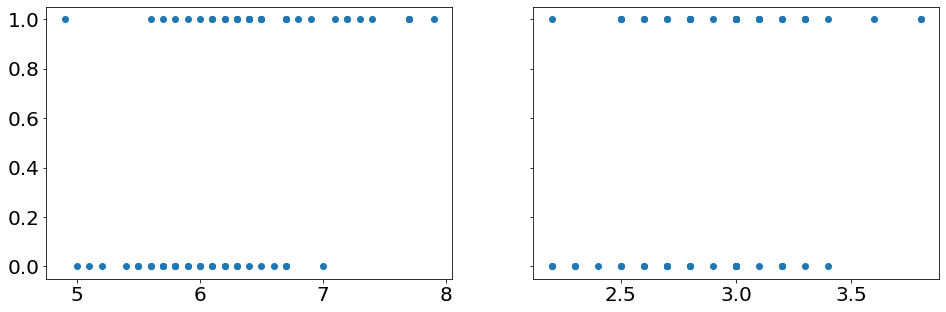

In [19]:
# Plot Train data
plt.rcParams["font.size"] = 20
fig,ax = plt.subplots(1,2,sharey=True,figsize=(16, 5))

ax[0].scatter(X_train[:,0],y_train)
ax[1].scatter(X_train[:,1],y_train);

In [20]:
def regression_net(x):
    """
    A simple three-layer neural network
    """
    # Declaring weights and biases
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # tf.add and + are equivalent
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] 
    
    return layer_output

In [21]:
# Configure hyperparameters
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# Determine the form of the arguments to be passed to the computational graph
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_classes])

# train's mini-batch iterator
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# Load the network structure                               
logits = regression_net(X)

# Objective function
loss_op = tf.reduce_mean(tf.square(logits - Y))

# Optimization methods
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Index value calculation
mean_square_error = tf.reduce_mean(tf.square(logits - Y))

# Initialize the variable
init = tf.global_variables_initializer()

# Run a computational graph
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        # Loop per epoch
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_mse = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            
            # Loop for each mini-batch
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            
            loss, mse = sess.run([loss_op, mean_square_error],
                                 feed_dict={X: mini_batch_x, Y: mini_batch_y}
            )
            total_loss += loss
            total_mse += mse
            
        total_loss /= n_samples
        total_mse /= n_samples
        
        val_loss, val_mse = sess.run([loss_op, mean_square_error],
                                     feed_dict={X: X_val, Y: y_val}
        )
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, mse : {:.3f}, val_mse : {:.3f}"
              .format(epoch, loss, val_loss, mse, val_mse))
    test_mse = sess.run(mean_square_error, feed_dict={X: X_test, Y: y_test})
    print("test_mse : {:.3f}".format(test_mse))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epoch 0, loss : 2560.0999, val_loss : 645.1661, mse : 2560.100, val_mse : 645.166
Epoch 1, loss : 616.1554, val_loss : 635.3689, mse : 616.155, val_mse : 635.369
Epoch 2, loss : 1559.3174, val_loss : 400.0242, mse : 1559.317, val_mse : 400.024
Epoch 3, loss : 295.3759, val_loss : 227.0753, mse : 295.376, val_mse : 227.075
Epoch 4, loss : 774.6631, val_loss : 235.4555, mse : 774.663, val_mse : 235.455
Epoch 5, loss : 126.2909, val_loss : 100.0781, mse : 126.291, val_mse : 100.078
Epoch 6, loss : 294.1947, val_loss : 118.4897, mse : 294.195, val_mse : 118.490
Epoch 7, loss : 40.5826, val_loss : 25.2480, mse : 40.583, val_mse : 25.248
Epoch 8, loss : 36.8251, val_loss : 26.5389, mse : 36.825, val_mse : 26.539
Epoch 9, loss : 37.0581, val_loss : 37.3719, mse : 37.058, val_mse : 37.372
test_mse : 19.842


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


### 【Problem 5】Create a model for MNIST
Create a model to classify the MNIST used in the neural network scratch.

It is the same as the previous Iris in terms of classification of three or more classes. The difference is that the input is an image.

Please aim to reproduce the model implemented in Scratch.

In [22]:
"""
Problem 5: Classify MNIST data using a neural network implemented in TensorFlow.
"""
# Download the MNIST dataset
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [23]:
# Check the data
print(X.shape) # (60000, 28, 28)
print(X.shape) # (10000, 28, 28)
print(X[0].dtype) # uint8

(60000, 28, 28)
(60000, 28, 28)
uint8


In [24]:
# Smoothing
X = X.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [25]:
# Type conversion, normalization
X = X.astype(np.float)
X_test = X_test.astype(np.float)
X /= 255
X_test /= 255
print(X.max()) # 1.0
print(X.min()) # 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


1.0
0.0


In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_one_hot = enc.fit_transform(y[:, np.newaxis])
y_test = enc.transform(y_test[:, np.newaxis])
print(y.shape) # (60000,)
print(y_one_hot.shape) # (60000, 10)
print(y_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [29]:
def lenet(x):
    """
    CNN
    """
    # Declaring weights and biases
    weights = {
        'w1': tf.Variable(tf.random_normal([5,5,1,6])),
        'w2': tf.Variable(tf.random_normal([5,5,6,16])),
        'w3': tf.Variable(tf.random_normal([7*7*16, 120])),
        'w4': tf.Variable(tf.random_normal([120, 84])),
        'w5': tf.Variable(tf.random_normal([84, n_classes]))
    }
    
    biases = {
        'b1': tf.Variable(tf.random_normal([6])),
        'b2': tf.Variable(tf.random_normal([16])),
        'b3': tf.Variable(tf.random_normal([120])),
        'b4': tf.Variable(tf.random_normal([84])),
        'b5': tf.Variable(tf.random_normal([n_classes]))
    }
    
    x = tf.reshape(x, [-1, 28, 28, 1])
    conve_1 = tf.add(tf.nn.conv2d(x, weights['w1'],strides=[1,1,1,1],
                                  padding='SAME'),
                     biases['b1'])
    
    conve_1 = tf.nn.relu(conve_1)
    
    pooli_1 = tf.nn.pool(conve_1, window_shape=[2,2],strides=[2,2],
                         pooling_type='MAX', padding='VALID')
    
    conve_2 = tf.add(tf.nn.conv2d(pooli_1, weights['w2'],strides=[1,1,1,1],
                                  padding='SAME'),
                     biases['b2'])
    
    conve_2 = tf.nn.relu(conve_2)
    
    pooli_2 = tf.nn.pool(conve_2, window_shape=[2,2],strides=[2,2],
                         pooling_type='MAX', padding='VALID')
    
    x_reshape = tf.reshape(pooli_2, [-1,7*7*16])
    layer_1 = tf.add(tf.matmul(x_reshape, weights['w3']), biases['b3'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w4']), biases['b4'])
    layer_2 = tf.nn.relu(layer_2)
    # tf.add and + are equivalent
    layer_output = tf.matmul(layer_2, weights['w5']) + biases['b5'] 
    
    return layer_output

In [30]:
# Configure hyperparameters
learning_rate = 0.01
batch_size = 200
num_epochs = 30

n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

# Determine the form of the arguments to be passed to the computational graph
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# train's mini-batch iterator
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# Load the network structure                               
logits = lenet(X)

# Objective function
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                         labels=Y, logits=logits)
                        )

# Optimization methods
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Estimation results
correct_pred = tf.equal(tf.argmax(Y,1), tf.argmax(tf.nn.softmax(logits),1))

# Index value calculation
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variable
init = tf.global_variables_initializer()

# Run a computational graph
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        # Loop per epoch
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_acc = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            
            # Loop for each mini-batch
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run(
                [loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            total_acc += acc
            
        total_loss /= n_samples
        total_acc /= n_samples
    
        val_loss, val_acc = sess.run(
            [loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}"
             .format(epoch, loss, val_loss, acc, val_acc))
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

Epoch 0, loss : 176.5230, val_loss : 189.6576, acc : 0.850, val_acc : 0.834
Epoch 1, loss : 74.2056, val_loss : 91.7985, acc : 0.890, val_acc : 0.891
Epoch 2, loss : 55.5757, val_loss : 67.3523, acc : 0.915, val_acc : 0.900
Epoch 3, loss : 39.2660, val_loss : 47.1562, acc : 0.935, val_acc : 0.919
Epoch 4, loss : 41.1170, val_loss : 38.9048, acc : 0.915, val_acc : 0.926
Epoch 5, loss : 23.4336, val_loss : 30.0402, acc : 0.950, val_acc : 0.935
Epoch 6, loss : 18.0731, val_loss : 26.1876, acc : 0.955, val_acc : 0.938
Epoch 7, loss : 12.9544, val_loss : 20.9767, acc : 0.960, val_acc : 0.943
Epoch 8, loss : 10.8722, val_loss : 18.7001, acc : 0.945, val_acc : 0.945
Epoch 9, loss : 6.7474, val_loss : 17.0014, acc : 0.965, val_acc : 0.949
Epoch 10, loss : 5.7916, val_loss : 15.7028, acc : 0.955, val_acc : 0.950
Epoch 11, loss : 6.1213, val_loss : 14.7780, acc : 0.940, val_acc : 0.950
Epoch 12, loss : 2.1485, val_loss : 13.7267, acc : 0.960, val_acc : 0.952
Epoch 13, loss : 2.5963, val_loss : 1